In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [59]:
df = pd.read_csv('../other/frac_merge_peak.csv')


In [60]:
X = df[[u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Cluster_Spacing', u'Perfs/Cluster', 
        u'Fluid_Bbls', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', u'Prop_Lbs', u'Prop_Lbs/Ft', 
        u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc', u'Avg_Rate', u'Max_Rate', 
        u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure', u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft', 
        u'XEC_FIELD', u'Reservoir']]
y = df[[u'OIL_Peak']]


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_primary = X_train[[u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Perfs/Cluster', 
                           u'Fluid_Bbls', u'Prop_Lbs', u'XEC_FIELD', u'Reservoir']]
X_train_secondary = X_train[[u'Cluster_Spacing', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', 
                             u'Prop_Lbs/Ft', u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc',
                             u'Avg_Rate', u'Max_Rate', u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure', 
                             u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft', u'XEC_FIELD', u'Reservoir']]
X.shape, X_train.shape, X_test.shape


((178, 27), (133, 27), (45, 27))

In [62]:
print 'All:'
print X.groupby('XEC_FIELD')['XEC_FIELD'].count()
print
print 'Train:'
print X_train.groupby('XEC_FIELD')['XEC_FIELD'].count()
print
print 'Test:'
print X_test.groupby('XEC_FIELD')['XEC_FIELD'].count()

All:
XEC_FIELD
COTTONWOOD DRAW    14
DIXIELAND          47
FORD, WEST         91
GRISHAM             9
PHANTOM             7
RED HILLS           1
STATELINE           3
TWO GEORGES         6
Name: XEC_FIELD, dtype: int64

Train:
XEC_FIELD
COTTONWOOD DRAW    12
DIXIELAND          33
FORD, WEST         66
GRISHAM             7
PHANTOM             7
RED HILLS           1
STATELINE           2
TWO GEORGES         5
Name: XEC_FIELD, dtype: int64

Test:
XEC_FIELD
COTTONWOOD DRAW     2
DIXIELAND          14
FORD, WEST         25
GRISHAM             2
STATELINE           1
TWO GEORGES         1
Name: XEC_FIELD, dtype: int64


In [63]:
print 'All:'
print X.groupby('Reservoir')['Reservoir'].count()
print
print 'Train:'
print X_train.groupby('Reservoir')['Reservoir'].count()
print
print 'Test:'
print X_test.groupby('Reservoir')['Reservoir'].count()

All:
Reservoir
Wolfcamp Shale A    89
Wolfcamp Shale C    14
Wolfcamp Shale D    75
Name: Reservoir, dtype: int64

Train:
Reservoir
Wolfcamp Shale A    69
Wolfcamp Shale C     9
Wolfcamp Shale D    55
Name: Reservoir, dtype: int64

Test:
Reservoir
Wolfcamp Shale A    20
Wolfcamp Shale C     5
Wolfcamp Shale D    20
Name: Reservoir, dtype: int64


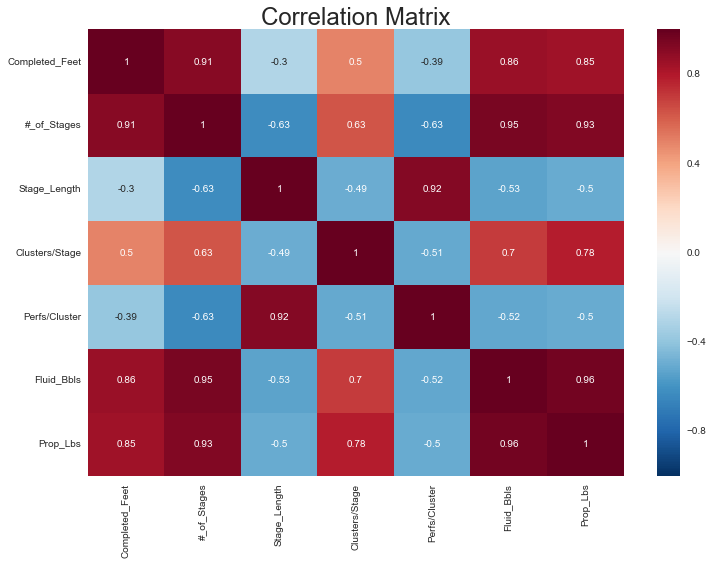

In [70]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
sns.heatmap(X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1).corr(), annot=True, ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix', fontsize=24)
# plt.savefig('../other/figures/correlation_matrix', dpi=400)

In [48]:
X_mod_int = sm.add_constant(X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1))
model = sm.OLS(y_train, X_mod_int)
model = model.fit()
print model.summary()


                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     10.47
Date:                Mon, 07 Nov 2016   Prob (F-statistic):           2.67e-10
Time:                        09:30:12   Log-Likelihood:                -901.86
No. Observations:                 133   AIC:                             1820.
Df Residuals:                     125   BIC:                             1843.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const           1051.0072    345.812      3.

In [49]:
model = sm.OLS(y_train, X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1))
model = model.fit()
print model.summary()

                            OLS Regression Results                            
Dep. Variable:               OIL_Peak   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 07 Nov 2016   Prob (F-statistic):           1.02e-57
Time:                        09:30:15   Log-Likelihood:                -906.60
No. Observations:                 133   AIC:                             1827.
Df Residuals:                     126   BIC:                             1847.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Completed_Feet     0.0156      0.037      0.

In [7]:
model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1), y_train)
print model.score(X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1), y_train), model.intercept_, model.coef_

0.369520395777 [ 1051.00715898] [[  1.06225013e-01  -1.94659857e+01  -2.29249016e+00  -2.91311940e+01
   -1.09381283e+00   8.20364958e-04  -3.95883168e-06]]


In [9]:
model = LinearRegression(fit_intercept=False, normalize=False)
model.fit(X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1), y_train)
print model.score(X_train_primary.drop(['XEC_FIELD', 'Reservoir'], axis=1), y_train), model.intercept_, model.coef_

0.322930461528 0.0 [[  1.56444250e-02   1.73905693e+01   4.29471046e-01   6.79616483e+01
   -9.98445487e+00   7.88164696e-04  -4.85491585e-05]]


In [17]:
model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_train[[u'Clusters/Stage', u'Perfs/Cluster', u'#_of_Stages', u'Fluid_Bbls']], y_train)
print model.score(X_train[[u'Clusters/Stage', u'Perfs/Cluster', u'#_of_Stages', u'Fluid_Bbls']], y_train), model.intercept_, model.coef_

0.34133130687 [ 666.38718114] [[ -4.38921946e+01  -1.57224900e+01   7.20340864e+00   4.23739065e-04]]


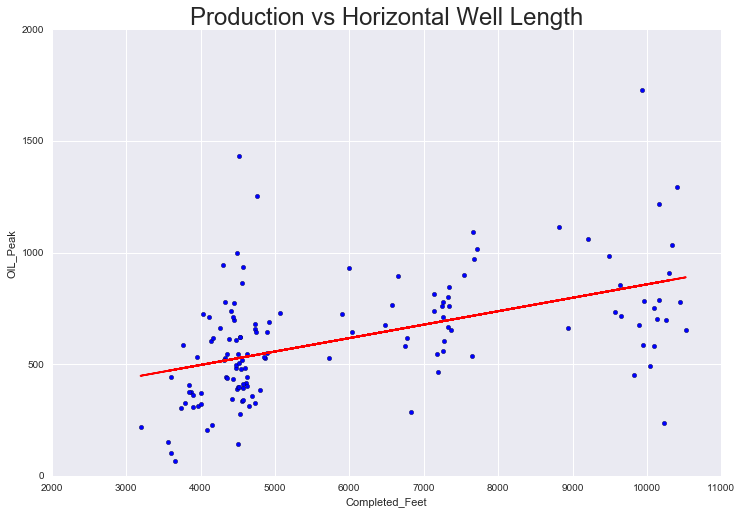

In [73]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['Completed_Feet'], y_train)
fit = np.polyfit(X_train['Completed_Feet'], y_train, deg=1)
ax.plot(X_train['Completed_Feet'], fit[0] * X_train['Completed_Feet'] + fit[1], color='red')
ax.set_ylim([0,2000])
ax.set_xlabel('Completed_Feet')
ax.set_ylabel('OIL_Peak')
ax.set_title('Production vs Horizontal Well Length', fontsize=24)
# plt.savefig('../other/figures/completed_feet', dpi=400)

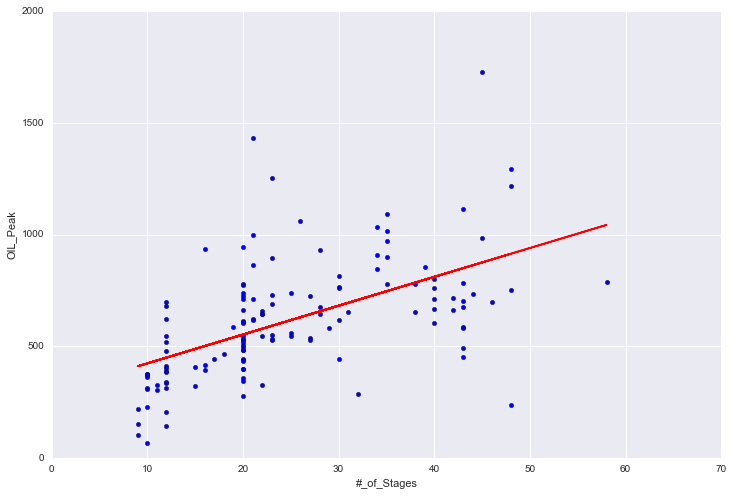

In [54]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['#_of_Stages'], y_train)
fit = np.polyfit(X_train['#_of_Stages'], y_train, deg=1)
ax.plot(X_train['#_of_Stages'], fit[0] * X_train['#_of_Stages'] + fit[1], color='red')
ax.set_ylim([0,2000])
ax.set_xlabel('#_of_Stages')
ax.set_ylabel('OIL_Peak')


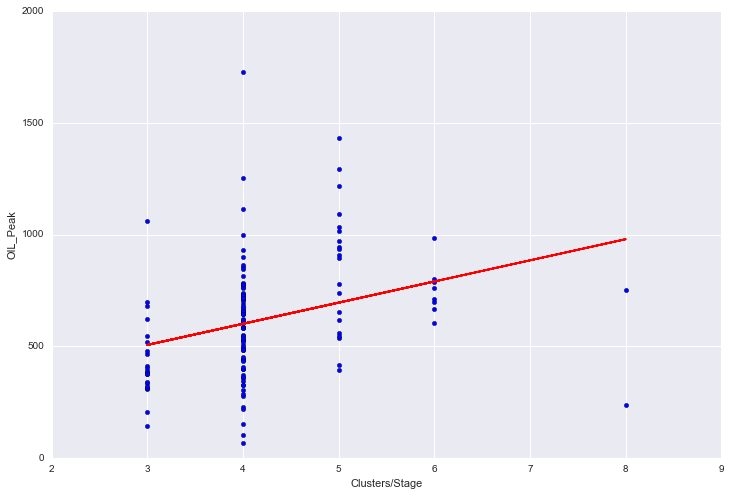

In [53]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['Clusters/Stage'], y_train)
fit = np.polyfit(X_train['Clusters/Stage'], y_train, deg=1)
ax.plot(X_train['Clusters/Stage'], fit[0] * X_train['Clusters/Stage'] + fit[1], color='red')
ax.set_ylim([0,2000])
ax.set_xlabel('Clusters/Stage')
ax.set_ylabel('OIL_Peak')


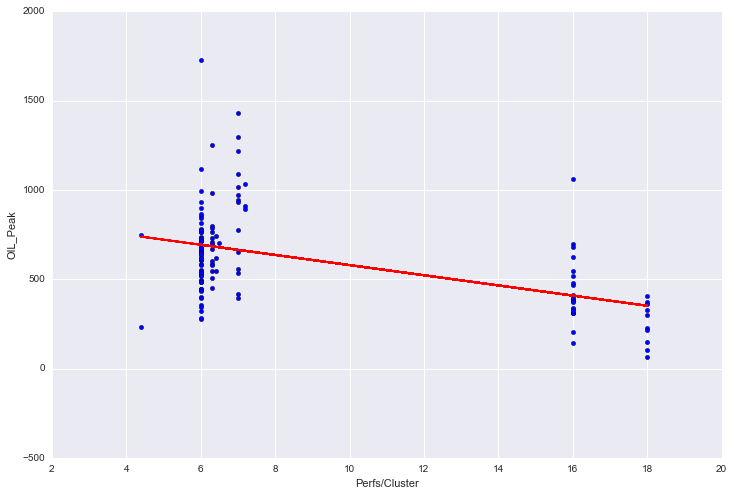

In [55]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['Perfs/Cluster'], y_train)
fit = np.polyfit(X_train['Perfs/Cluster'], y_train, deg=1)
ax.plot(X_train['Perfs/Cluster'], fit[0] * X_train['Perfs/Cluster'] + fit[1], color='red')
ax.set_xlabel('Perfs/Cluster')
ax.set_ylabel('OIL_Peak')


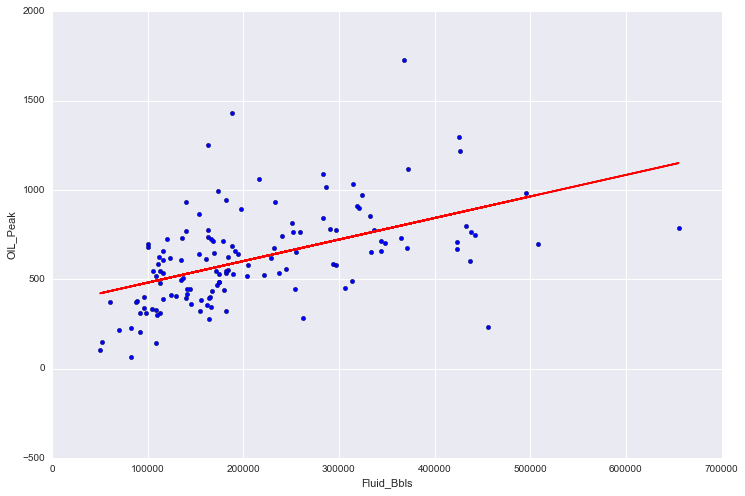

In [57]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_train['Fluid_Bbls'], y_train)
fit = np.polyfit(X_train['Fluid_Bbls'], y_train, deg=1)
ax.plot(X_train['Fluid_Bbls'], fit[0] * X_train['Fluid_Bbls'] + fit[1], color='red')
ax.set_xlabel('Fluid_Bbls')
ax.set_ylabel('OIL_Peak')


In [15]:
X.columns

Index([u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage',
       u'Cluster_Spacing', u'Perfs/Cluster', u'Fluid_Bbls', u'Fluid_Gal/Ft',
       u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', u'Prop_Lbs', u'Prop_Lbs/Ft',
       u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc',
       u'Max_Prop_Conc', u'Avg_Rate', u'Max_Rate', u'Rate/Ft', u'Rate/Cluster',
       u'Rate/Perf', u'Avg_Pressure', u'Max_Pressure', u'ISIP/Ft',
       u'5"_SIP/Ft'],
      dtype='object')

In [34]:
X_rank = X_train[['Clusters/Stage', 'Perfs/Cluster', '#_of_Stages', 'Stage_Length', 'Completed_Feet', 'Fluid_Bbls', 
             'Prop_Lbs', 'ISIP/Ft', '5"_SIP/Ft', 'Rate/Ft', 'Rate/Perf', 'Avg_Prop_Conc', 'Max_Prop_Conc', 
             'Rate/Cluster', 'Max_Rate', 'Avg_Rate', 'Cluster_Spacing', 'Avg_Pressure', 'Prop_Lbs/Ft', 'Prop_Lbs/Perf',
             'Max_Pressure', 'Fluid_Gal/Perf', 'Fluid_Gal/Ft', 'Prop_Lbs/Cluster', 'Fluid_Gal/Cluster']]
X_rank.shape


(133, 25)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5]),
 <a list of 25 Text yticklabel objects>)

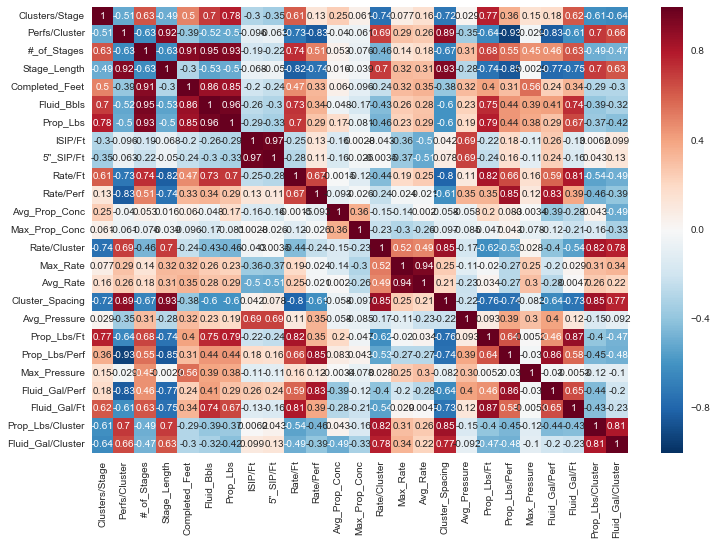

In [35]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
sns.heatmap(X_rank.corr(), annot=True, ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


In [38]:
X_RFE = X_train[[u'Clusters/Stage', u'Perfs/Cluster', u'#_of_Stages', u'ISIP/Ft', u'Rate/Ft', u'Rate/Perf', 
                 u'Avg_Prop_Conc', u'Max_Prop_Conc', u'Rate/Cluster', u'Max_Rate', u'Cluster_Spacing', u'Avg_Pressure', 
                 u'Prop_Lbs/Ft', u'Prop_Lbs/Perf', u'Max_Pressure', u'Fluid_Gal/Perf', u'Fluid_Gal/Ft', 
                 u'Prop_Lbs/Cluster', u'Fluid_Gal/Cluster']]
X_RFE.shape


(133, 19)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5]),
 <a list of 19 Text yticklabel objects>)

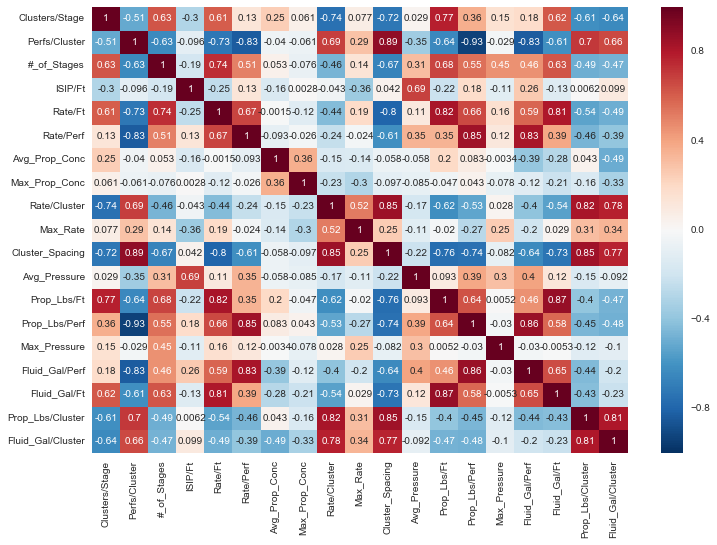

In [37]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
sns.heatmap(X_RFE.corr(), annot=True, ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)


In [31]:
model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_RFE, y_train)
print model.score(X_RFE, y_train), model.intercept_, model.coef_

0.53531511995 [ 2695.7144263] [[ -1.77596247e+02  -6.09922017e+01   8.25066642e+00   2.51422238e+00
   -1.65431622e+03   9.85447810e+03  -8.00680761e+02  -2.81056196e+02
   -2.44711942e+01  -8.60309177e+01   1.33334506e+01   2.51422229e+00
    1.53773996e-01  -8.59002664e-01   6.47704763e-02  -7.53023944e-02
    9.56697938e-03  -5.52638513e-01   7.89074507e-03   1.01606335e-03]]


In [39]:
X_PYMC = X_train[[u'Clusters/Stage', u'Perfs/Cluster', u'#_of_Stages', u'ISIP/Ft', u'Rate/Ft', u'Rate/Perf', 
                 u'Avg_Prop_Conc', u'Max_Prop_Conc', u'Rate/Cluster']]
X_PYMC.shape

(133, 9)

In [40]:
model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_PYMC, y_train)
print model.score(X_PYMC, y_train), model.intercept_, model.coef_

0.383875601387 [ 1592.71297439] [[ -88.57297457  -44.49046904    9.65872318 -481.4016334   763.27743341
  -212.45214463   57.34882617  -27.66254668   12.41093527]]
